In [1]:
Name = ['Happy Patel']


In [16]:
# Required library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Task 1: Exploratory Data Analysis

In [17]:
# Load the data
data = pd.read_csv('https://data.cityofnewyork.us/api/views/8gpu-s594/rows.csv?accessType=DOWNLOAD')
data.describe()

,SED APPROVED ESTIMATE,POSTCODE,LATITUDE,LONGITUDE,COMMUNITY BOARD,COUNCIL DISTRICT,CENSUS TRACT (2020),BIN,BBL
count,4.900000e+02,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,4.900000e+02,4.900000e+02
mean,1.003658e+06,10873.063265,40.715586,-73.923176,299.800000,27.220408,7446.532653,3.043202e+06,2.967029e+09
std,2.882378e+06,526.545463,0.085431,0.098533,116.537858,14.570483,20375.566981,1.216874e+06,1.181777e+09
min,1.000000e+04,10002.000000,40.520699,-74.211264,101.000000,1.000000,7.000000,1.001388e+06,1.001130e+09
25%,3.956900e+04,10453.000000,40.653006,-73.980663,205.000000,15.000000,177.000000,2.012323e+06,2.030535e+09
50%,1.216040e+05,11208.000000,40.706242,-73.922171,310.000000,27.000000,387.000000,3.104598e+06,3.042780e+09
75%,5.371925e+05,11235.000000,40.785150,-73.865526,408.000000,41.000000,1211.250000,4.149537e+06,4.060243e+09
max,3.975528e+07,11694.000000,40.895104,-73.709137,503.000000,51.000000,157903.000000,5.113169e+06,5.067960e+09


In [4]:
data

,PROJECT NUMBER,BUILDING ID,PROJECT DESCRIPTION,SCHOOL NAME,SCHOOL ADDRESS,SED APPROVED ESTIMATE,DATE APPLICATION SUBMITTED TO SED,BOROUGH,POSTCODE,LATITUDE,LONGITUDE,COMMUNITY BOARD,COUNCIL DISTRICT,CENSUS TRACT (2020),BIN,BBL,NTA (2020)
0,1E5P,K127,Building Envelope Improvement - Reconstruction...,P.S. 127 - BROOKLYN,922 78TH STREET,10282093,09/30/2022,BROOKLYN,11228,40.623762,-74.017799,310,38,206,3150481,3059730001,BK1002
1,1E5Q,X004,Indoor Building Improvement - Conversion of Ad...,P.S. 4 - BRONX,1701 FULTON AVENUE,3763139,09/30/2022,BRONX,10457,40.840891,-73.898166,203,15,165,2009659,2029300001,BX0302
2,1E5R,R075,Science Lab Upgrade,I.S. 75 - STATEN ISLAND,455 HUGUENOT AVENUE,1280000,09/30/2022,STATEN IS,10312,40.544380,-74.197897,503,51,17014,5079651,5060500002,SI0303
3,1E5T,K127,Building Envelope Improvement - Parapet Recons...,P.S. 127 - BROOKLYN,922 78TH STREET,2905838,09/30/2022,BROOKLYN,11228,40.623762,-74.017799,310,38,206,3150481,3059730001,BK1002
4,1E5U,K127,Building System Improvement - Boiler Conversion,P.S. 127 - BROOKLYN,922 78TH STREET,8965908,09/30/2022,BROOKLYN,11228,40.623762,-74.017799,310,38,206,3150481,3059730001,BK1002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,1EJL,Q094,Asbestos abatement,P.S. 94 - QUEENS,41-77 LITTLE NECK PARKWAY,18059,12/30/2022,QUEENS,11363,40.771186,-73.739252,411,19,1479,4169468,4081350029,QN1103
486,1EJM,K371,Asbestos abatement,K371 SPED - BROOKLYN,355 37 STREET,58537,12/30/2022,BROOKLYN,11232,40.654293,-74.005889,307,38,84,3337059,3006960031,BK0702
487,1EJN,K127,Asbestos abatement,P.S. 127 - BROOKLYN,922 78TH STREET,87939,12/30/2022,BROOKLYN,11228,40.623762,-74.017799,310,38,206,3150481,3059730001,BK1002
488,1EJO,Q085,Asbestos abatement,P.S. 85 - QUEENS,23-70 31 STREET,32755,12/30/2022,QUEENS,11105,40.772932,-73.914625,401,22,115,4017485,4008420031,QN0101


In [19]:
from sklearn.preprocessing import LabelEncoder
# Encoding the features to numeric
lbl = LabelEncoder()
data['PROJECT NUMBER'] = lbl.fit_transform(data['PROJECT NUMBER'])
data['PROJECT DESCRIPTION'] = lbl.fit_transform(data['PROJECT DESCRIPTION'])
data['SCHOOL NAME'] = lbl.fit_transform(data['SCHOOL NAME'])
data['SCHOOL ADDRESS'] = lbl.fit_transform(data['SCHOOL ADDRESS'])
data['BOROUGH'] = lbl.fit_transform(data['BOROUGH'])
data['NTA (2020)'] = lbl.fit_transform(data['NTA (2020)'])
data['BUILDING ID'] = lbl.fit_transform(data['BUILDING ID'])
data['DATE APPLICATION SUBMITTED TO SED'] = lbl.fit_transform(data['DATE APPLICATION SUBMITTED TO SED'])
data

,PROJECT NUMBER,BUILDING ID,PROJECT DESCRIPTION,SCHOOL NAME,SCHOOL ADDRESS,SED APPROVED ESTIMATE,DATE APPLICATION SUBMITTED TO SED,BOROUGH,POSTCODE,LATITUDE,LONGITUDE,COMMUNITY BOARD,COUNCIL DISTRICT,CENSUS TRACT (2020),BIN,BBL,NTA (2020)
0,0,33,5,150,319,10282093,0,1,11228,40.623762,-74.017799,310,38,206,3150481,3059730001,20
1,1,271,21,252,84,3763139,0,0,10457,40.840891,-73.898166,203,15,165,2009659,2029300001,46
2,2,264,31,91,225,1280000,0,4,10312,40.544380,-74.197897,503,51,17014,5079651,5060500002,151
3,3,33,4,150,319,2905838,0,1,11228,40.623762,-74.017799,310,38,206,3150481,3059730001,20
4,4,33,7,150,319,8965908,0,1,11228,40.623762,-74.017799,310,38,206,3150481,3059730001,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,485,174,2,301,207,18059,1,3,11363,40.771186,-73.739252,411,19,1479,4169468,4081350029,122
486,486,80,2,103,197,58537,1,1,11232,40.654293,-74.005889,307,38,84,3337059,3006960031,14
487,487,33,2,150,319,87939,1,1,11228,40.623762,-74.017799,310,38,206,3150481,3059730001,20
488,488,171,2,291,131,32755,1,3,11105,40.772932,-73.914625,401,22,115,4017485,4008420031,90


In [6]:
# checking null values in the data
data.isnull().sum()

PROJECT NUMBER                       0
BUILDING ID                          0
PROJECT DESCRIPTION                  0
SCHOOL NAME                          0
SCHOOL ADDRESS                       0
SED APPROVED ESTIMATE                0
DATE APPLICATION SUBMITTED TO SED    0
BOROUGH                              0
POSTCODE                             0
LATITUDE                             0
LONGITUDE                            0
COMMUNITY BOARD                      0
COUNCIL DISTRICT                     0
CENSUS TRACT (2020)                  0
BIN                                  0
BBL                                  0
NTA (2020)                           0
dtype: int64

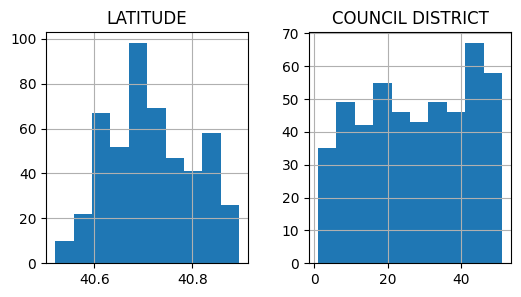

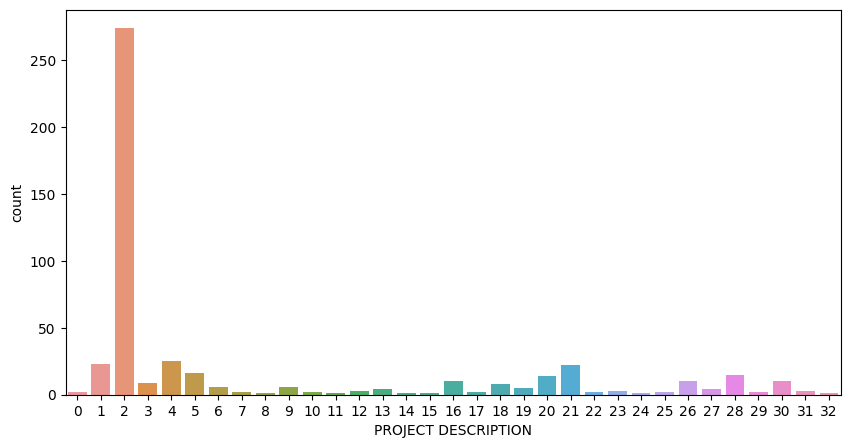

In [20]:
# Distribution of numerical columns we will be using
num_cols = ['LATITUDE','COUNCIL DISTRICT']
data[num_cols].hist(bins=10, figsize=(6,3))
plt.show()

# Distribution of categorical columns we will be using 
cat_cols = ['PROJECT DESCRIPTION']
for col in cat_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(data=data, x=col)
    plt.show()

<AxesSubplot:>

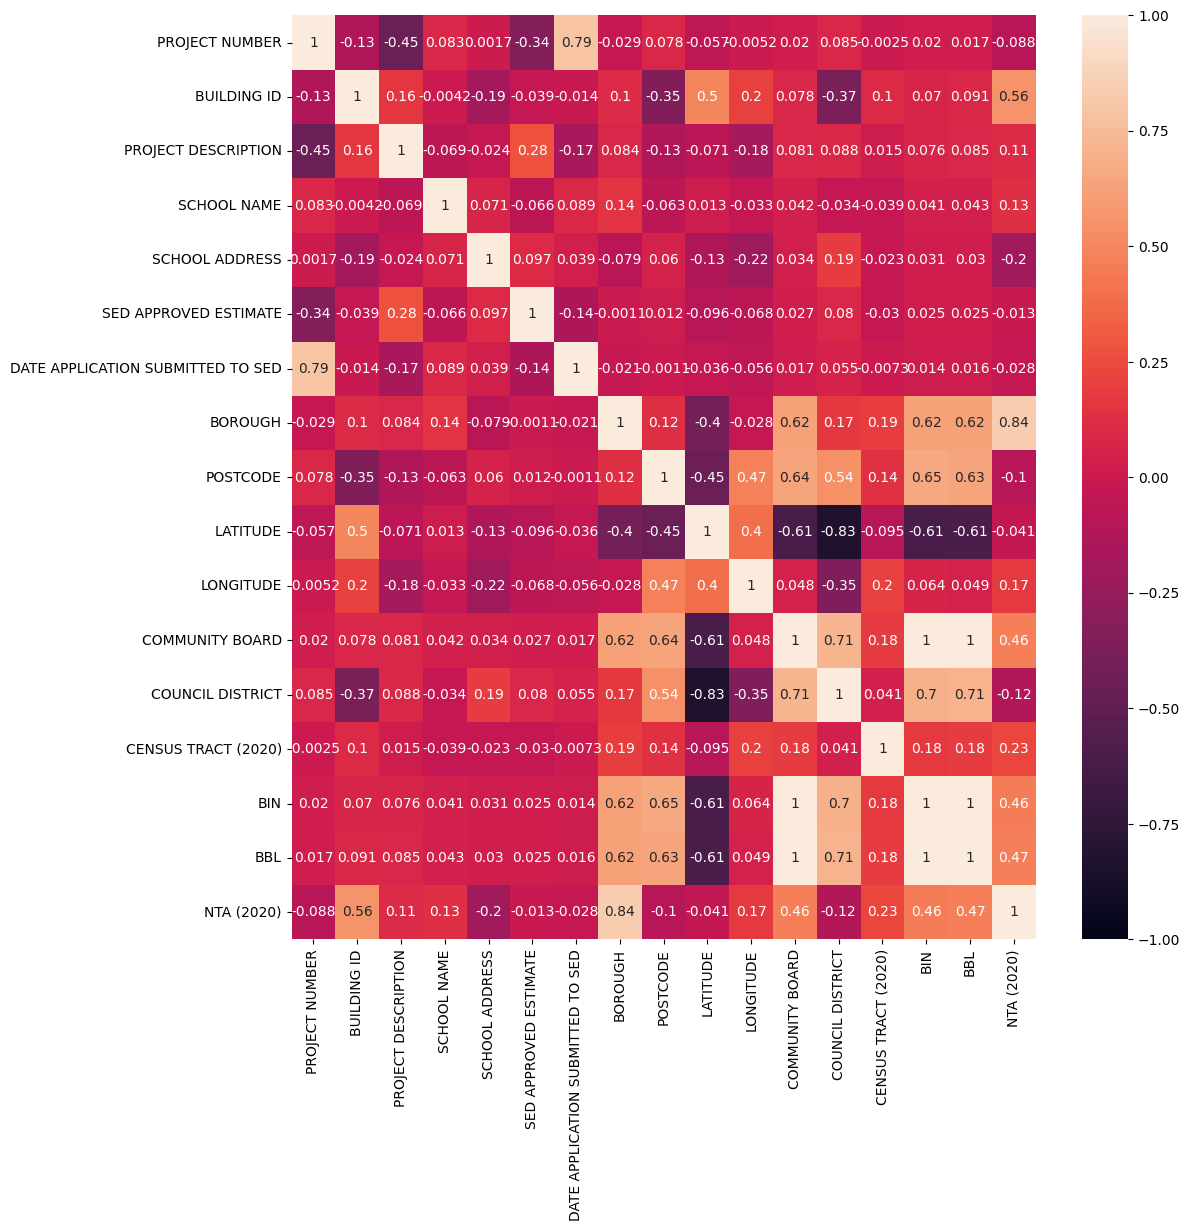

In [8]:
import seaborn as sns
myColors = ("red","white","blue")
cmap1 = clr.LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
plt.figure(figsize=(12,12))
sns.heatmap(corr,mask = mask, vmin = -1, vmax = 1, annot=True)

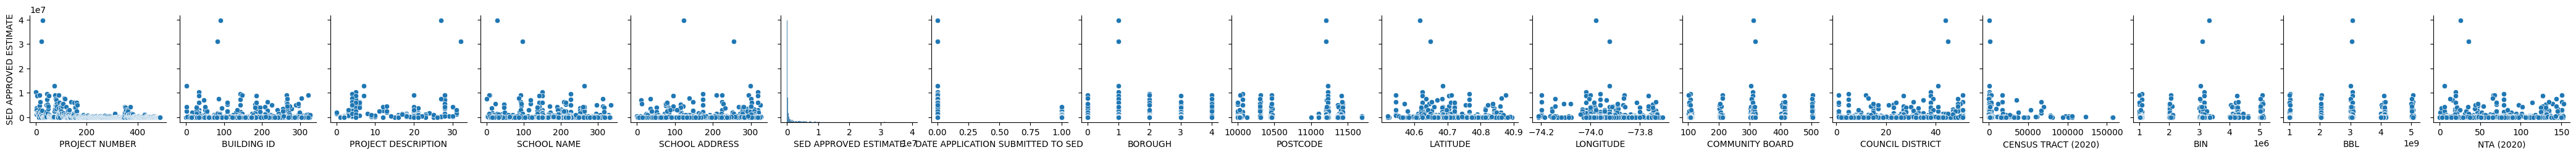

In [21]:
sns.pairplot(x_vars=pd.DataFrame(data),y_vars=pd.DataFrame(data['SED APPROVED ESTIMATE']),data=data)

In [24]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mutual_info_score

# Separate the target variable and features
X = data.drop(['SED APPROVED ESTIMATE'], axis=1)
y = data['SED APPROVED ESTIMATE']

# Compute the mutual information between each feature and the target variable
mi_scores = mutual_info_regression(X, y)

# Sort the features by their mutual information scores
feature_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Get the top feature with the highest score
top_feature = feature_scores.head(1).index.tolist()
print(top_feature)

['PROJECT DESCRIPTION']


In [12]:
# Setting the target
target = 'SED APPROVED ESTIMATE'
# Our model will estimate the amount of aid a school can recieve based on the 
# Latitude and Council District the school fall in. As well as, the Project
# Description the school is applying the aid for.  

# Task 2: Train Models

In [13]:
data.dropna(inplace=True)
X = np.array(data[['LATITUDE','COUNCIL DISTRICT','PROJECT DESCRIPTION']])
print(X)
# set target variable
y = np.array(data['SED APPROVED ESTIMATE'])

# spliting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[[40.623762 38.        5.      ]
 [40.840891 15.       21.      ]
 [40.54438  51.       31.      ]
 ...
 [40.623762 38.        2.      ]
 [40.772932 22.        2.      ]
 [40.659288 41.        2.      ]]


# Task 3: Test and Evaluate

In [25]:
# Decision Tree Model
regr = DecisionTreeRegressor(max_depth=4)
regr.fit(X, y)
regr.fit(X_train, y_train)
dt_y_pred = regr.predict(X_test)
print('Decision Tree')
print('R_2 score: %.2f' % r2_score(y_test,dt_y_pred))
print('mean square error: %d' % mean_squared_error(y_test,dt_y_pred))
print()

# K-NN Model
kn = KNeighborsRegressor(n_neighbors=2)
model=kn.fit(X, y)
kn.fit(X_train, y_train)
kn_y_pred = kn.predict(X_test)
print('KNN')
print('R_2 score: %.2f' % r2_score(y_test,kn_y_pred))
print('mean square error: %d' % mean_squared_error(y_test,kn_y_pred))

Decision Tree
R_2 score: 0.43
mean square error: 2953240326905

KNN
R_2 score: 0.37
mean square error: 3233463013358


In [15]:
from sklearn.tree import export_graphviz
from graphviz import render, Source

# visualize the decision tree
dot_data = export_graphviz(regr, out_file=None, 
                feature_names=['LATITUDE', 'COUNCIL DISTRICT', 'PROJECT DESCRIPTION'],  
                class_names=['SED APPROVED ESTIMATE'],  
                filled=True, rounded=True,  
                special_characters=True)

graph = Source(dot_data)
graph.format = 'png'
graph.render(filename='decision_tree')
graph.view()

'decision_tree.png'

# Task 4: Make Comparison

As we compare all three models on the data, we can conclude the best model based on above results: MSEs given by all models are a lot higher than the MSEs expected. 

However, the best model fit can be concluded by the coefficient of determination (R^2), which should be closer to 1 for the model to be defined as better working model. According to the results, Coefficient of determination given by 'Decision Tree Regression Model' is the highest among all. Which defines the model to be better working model for our data specifically. 

## Advantages of Decision Tree regression Model:
- Robust to outliers since they use median values to split the data, rather than the mean.
- Can capture non-linear relationships between the independent and dependent variables.

## Disadvantages of Decision Tree regression Model:
- Can be unstable since small changes in the data can lead to different splits, which can result in different predictions.
- Tend to favor features with a large number of categories, which can introduce bias into the model.

## Advantages of K-NN Model:
- Easy to understand and implement, making it a popular choice for beginners in machine learning.
- A lazy learner algorithm does not require any training time. The algorithm only needs to store the training data in memory and calculates predictions at runtime.

## Disadvantages of K-NN Model:
- Sensitive to the choice of K, the number of nearest neighbors to consider. Choosing an inappropriate K value can lead to overfitting or underfitting of the data.
- Sensitive to the scale of the features in the dataset. Features with larger scales can dominate the distance metric, leading to biased predictions.